In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Task 1

In [4]:
daily=pd.read_csv("MSFT_daily_dataset_1year.csv")

In [5]:
print(daily.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2022-01-03  335.350006  338.000000  329.779999  334.750000  330.813843   
1  2022-01-04  334.829987  335.200012  326.119995  329.010010  325.141357   
2  2022-01-05  325.859985  326.070007  315.980011  316.380005  312.659882   
3  2022-01-06  313.149994  318.700012  311.489990  313.880005  310.189270   
4  2022-01-07  314.149994  316.500000  310.089996  314.040009  310.347412   

     Volume  
0  28865100  
1  32674300  
2  40054300  
3  39646100  
4  32720000  


In [6]:
print(daily.tail(5))

           Date        Open        High         Low       Close   Adj Close  \
246  2022-12-23  236.110001  238.869995  233.940002  238.729996  238.133545   
247  2022-12-27  238.699997  238.929993  235.830002  236.960007  236.367981   
248  2022-12-28  236.889999  239.720001  234.169998  234.529999  233.944031   
249  2022-12-29  235.649994  241.919998  235.649994  241.009995  240.407837   
250  2022-12-30  238.210007  239.960007  236.660004  239.820007  239.220825   

       Volume  
246  21207000  
247  16688600  
248  17457100  
249  19770700  
250  21938500  


In [49]:
def Plot(df, state=2):
    if state==0:
        x=df['Date']
        y=df["Adj Close"]
        plt.xlabel("Date")
        plt.ylabel("Adj Close")
        plt.title("Price Variation with time")
        plt.plot(x,y)

    if state==1:
        x=df['Date']
        y=df["Volume"]
        plt.xlabel("Date")
        plt.ylabel("Volume")
        plt.title("Volume variation with time")
        plt.plot(x,y)

    if state==2:
        x=df["Volume"]
        y=df["Adj Close"]
        plt.scatter(x,y)
        z=np.polyfit(x,y,1)
        p=np.poly1d(z)
        plt.plot(x,p(x))

    if state==3:
        x=df['Date']
        y=df["Delta"]
        plt.xlabel("Date")
        plt.ylabel("Delta")
        plt.title("delta variation with time")
        plt.plot(x,y)
    

    if state==4:
        x=df['Volume']
        y=df["Delta"]
        plt.xlabel("Volume")
        plt.ylabel("Delta")
        plt.title("delta variation with time")
        plt.plot(x,y)

## Task 1.1 and 1.2

In [73]:
pricevolumes=daily.loc[:,["Date","Adj Close", "Volume"]]
pricevolumes['Roll']=pricevolumes['Adj Close'].rolling(window=10).mean()


0.2047685557549202


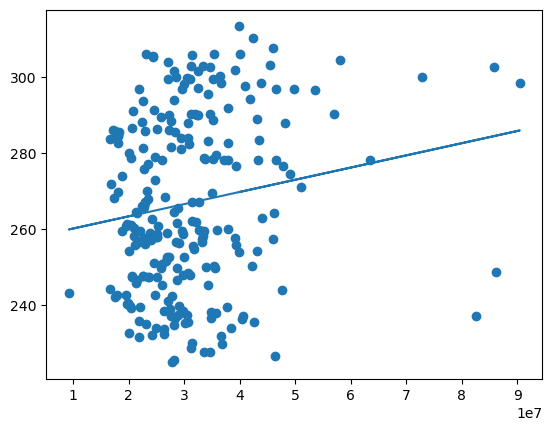

In [81]:
pricevolumes_roll=pricevolumes
pricevolumes_roll.dropna(inplace=True)
x=pricevolumes_roll['Volume']
y=pricevolumes_roll['Roll']
print(x.corr(y))
plt.scatter(x,y)
z=np.polyfit(x,y,1)
plt.plot(x,p(x))


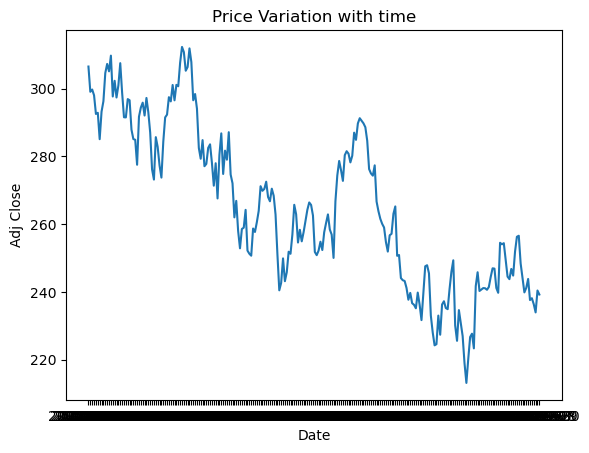

In [83]:
Plot(pricevolumes, state=0)

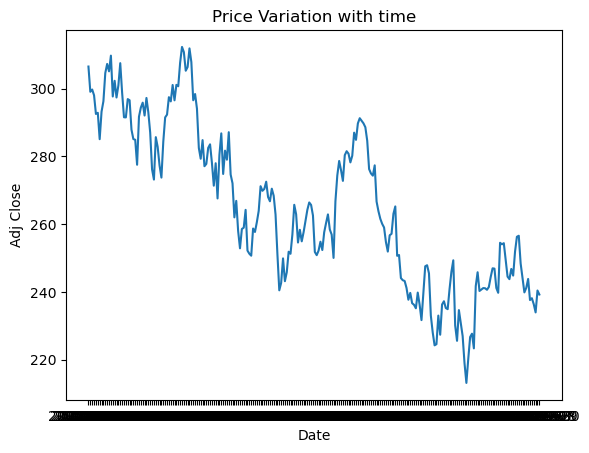

In [82]:
Plot(pricevolumes_roll, state=0)

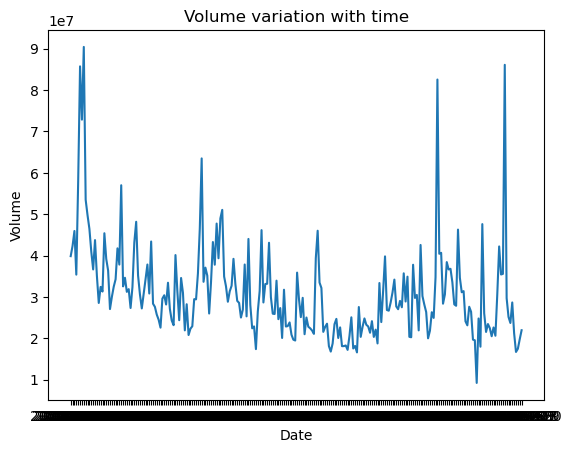

In [84]:
Plot(pricevolumes_roll, state=1)

#### Correlation

In [11]:
pricevolumes['Adj Close'].corr(pricevolumes['Volume'])

0.14781846713930535

This shows that the two quantities are almost independent, but with a weak correlation on such time scales

#### Regression

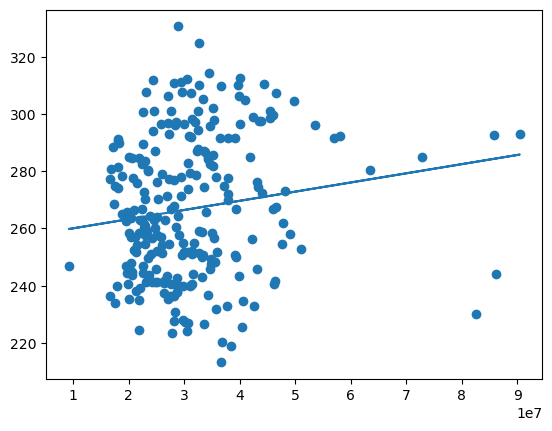

In [12]:
x=pricevolumes["Volume"]
y=pricevolumes["Adj Close"]
z=np.polyfit(x,y,1)
p=np.poly1d(z)


#Alrady implemented in the Plot function
Plot(pricevolumes)

According to the documentation, the polynomial fit employed in the `np.polyfit()` method uses the Least Squares method

The least squares, in case of a linear polynomial fit, finds the function $y_p=f(x)=mx+c$ such that the term:
$$
\Epsilon=\sum_{i=0}^{n} (y_{p_i}-y_i)^2=\sum_{i=0}^{n} (m x_i+c-y_i)^2
$$

is minimised, (thus the name least squared)

To do this, we differentiate with respect to both $m$ and $c$, such that:
$$
\frac{\partial E}{\partial m}=\frac{\partial E}{\partial c}=0
$$

$$
\Rightarrow 2\sum_{i=0}^{n}(mx_i+c-y_i)x_i=0
$$
and

$$
\Rightarrow 2\sum_{i=0}^{n}(mx_i+c-y_i)=0
$$

which gives us two variables and two equations to solve

## Task 1.3

#### Outliers

In [13]:
import statsmodels.api as sm
np.set_printoptions(suppress=True)
x=pricevolumes["Volume"]
y=pricevolumes["Adj Close"]

x = sm.add_constant(x)

# fit the model
dailymodel = sm.OLS(y, x).fit()

In [14]:
print(dailymodel.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.562
Date:                Wed, 26 Apr 2023   Prob (F-statistic):             0.0191
Time:                        10:57:19   Log-Likelihood:                -1160.3
No. Observations:                 251   AIC:                             2325.
Df Residuals:                     249   BIC:                             2332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        256.8475      4.529     56.715      0.0

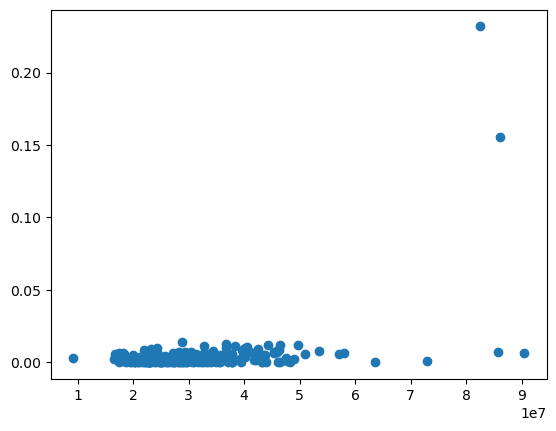

In [15]:
dailyinfluence = dailymodel.get_influence()
cooks_distances = dailyinfluence.cooks_distance
y=cooks_distances[0]
x=pricevolumes["Volume"]
plt.scatter(x,y)


Based on the graph above, I take the $\text{Threshold}=0.05$  

In [16]:
pricevolumes_new=pricevolumes
thresh=0.05
for i in range(len(pricevolumes)):
    if cooks_distances[0][i]>thresh:
        pricevolumes_new=pricevolumes_new.drop(pricevolumes_new.index[i])


In [86]:
pricevolumes_roll_new=pricevolumes_roll
thresh=0.05
for i in range(len(pricevolumes)):
    if cooks_distances[0][i]>thresh:
        pricevolumes_new=pricevolumes_new.drop(pricevolumes_new.index[i])


#### Final Model

In [87]:
# Correlation
pricevolumes_roll_new['Roll'].corr(pricevolumes_roll_new['Volume'])

0.2047685557549202

$\Rightarrow$ Weak positive correlation

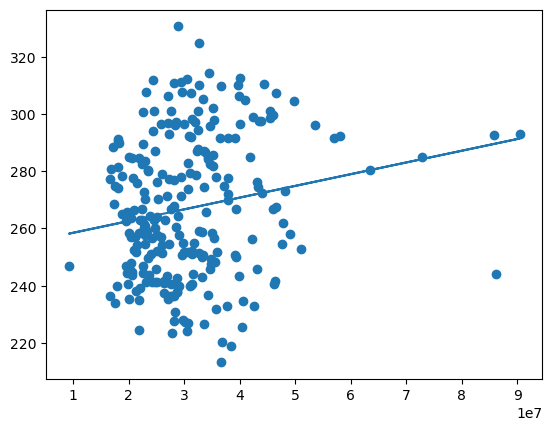

In [17]:
# x=pricevolumes_new["Volume"]
# y=pricevolumes_new["Adj Close"]
# plt.scatter(x,y)
# z=np.polyfit(x,y,1)
# p=np.poly1d(z)
# plt.plot(x,p(x), color="black")
# plt.xlabel("Volume")
# plt.ylabel("Adj Close price")
# plt.show()

Plot(pricevolumes_new)

## Task 1.4

### Weekly Analysis

In [18]:
### Weekly Analysis
weekly=pd.read_csv("MSFT_weekly_dataset.csv")
pricevolumesweekly=weekly.loc[:,["Date", "Adj Close", "Volume"]]

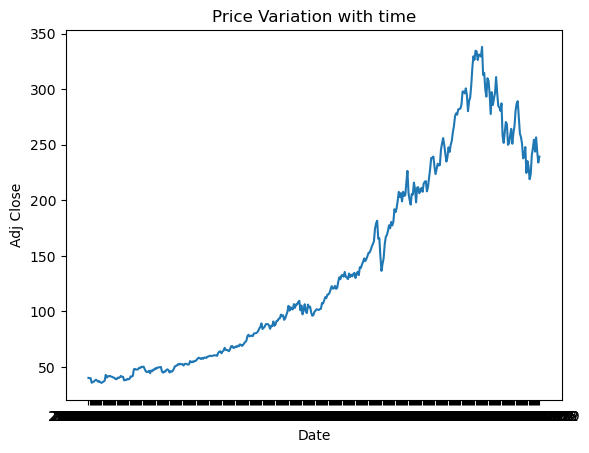

In [19]:
Plot(pricevolumesweekly, state=0)

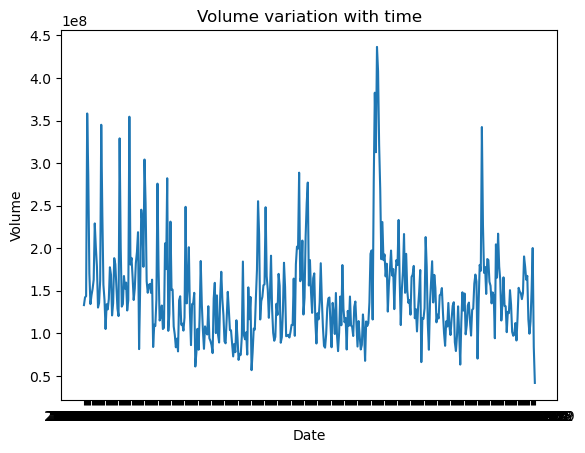

In [20]:
Plot(pricevolumesweekly, state=1)

#### Correlation

In [43]:
pricevolumesweekly['Adj Close'].corr(pricevolumesweekly['Volume'])

-0.05047909117206479

#### Regression

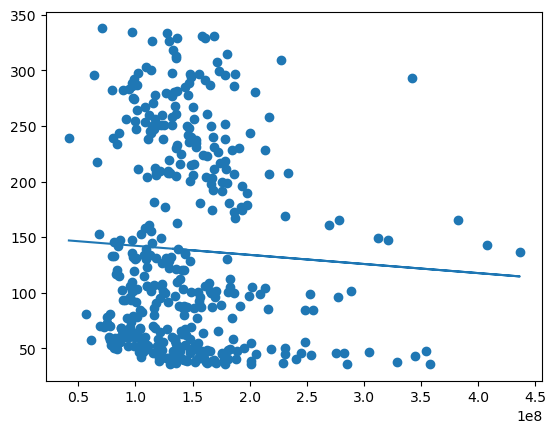

In [21]:
# x=pricevolumesweekly["Volume"]
# y=pricevolumesweekly["Adj Close"]
# plt.scatter(x,y)
# z=np.polyfit(x,y,1)
# p=np.poly1d(z)
# plt.plot(x,p(x), color="black")
# plt.xlabel("Volume")
# plt.ylabel(i+" price")
# plt.show()
Plot(pricevolumesweekly)

#### Outliers

In [22]:
x=pricevolumesweekly["Volume"]
y=pricevolumesweekly["Adj Close"]

x = sm.add_constant(x)

# fit the model
weeklymodel = sm.OLS(y, x).fit()
print(weeklymodel.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.063
Date:                Wed, 26 Apr 2023   Prob (F-statistic):              0.303
Time:                        10:57:22   Log-Likelihood:                -2471.3
No. Observations:                 418   AIC:                             4947.
Df Residuals:                     416   BIC:                             4955.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.5098     12.315     12.222      0.0

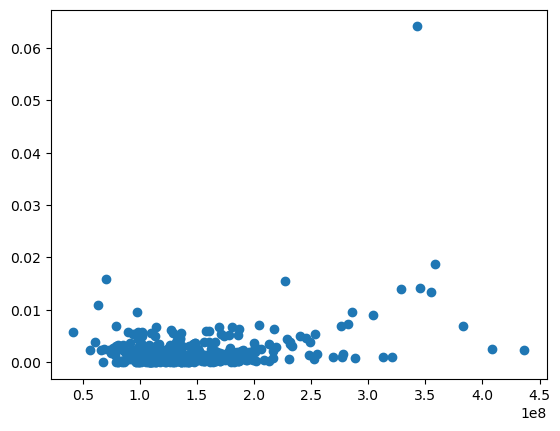

In [23]:
weeklyinfluence=weeklymodel.get_influence()
cooks_distances_weekly=weeklyinfluence.cooks_distance
y=cooks_distances_weekly[0]
x=pricevolumesweekly["Volume"]
plt.scatter(x,y)

$\text{Threshold}=0.01$

In [24]:
thresh=0.01
pricevolumes_new_weekly=pricevolumesweekly
for i in range(len(pricevolumesweekly)):
    if cooks_distances_weekly[0][i]>thresh:
        pricevolumes_new_weekly=pricevolumes_new_weekly.drop(pricevolumes_new_weekly.index[i])


#### Final Model

In [44]:
#Correlation
pricevolumes_new_weekly['Adj Close'].corr(pricevolumes_new_weekly['Volume'])

-0.04813846207679395

$\Rightarrow$ Very weak negative correlation

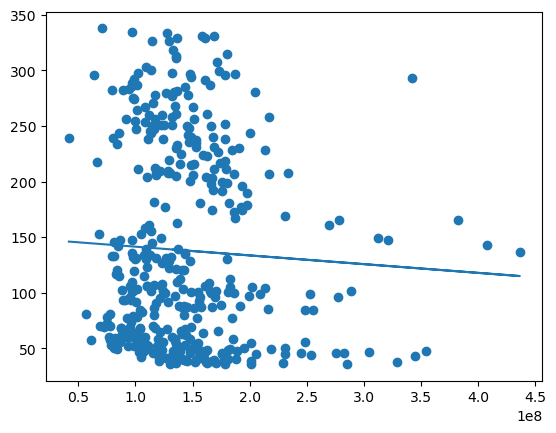

In [25]:
Plot(pricevolumes_new_weekly)

### Monthly Analysis

In [26]:
### Weekly Analysis
monthly=pd.read_csv("MSFT_monthly_dataset.csv")
pricevolumesmonthly=monthly.loc[:,["Date", "Adj Close", "Volume"]]

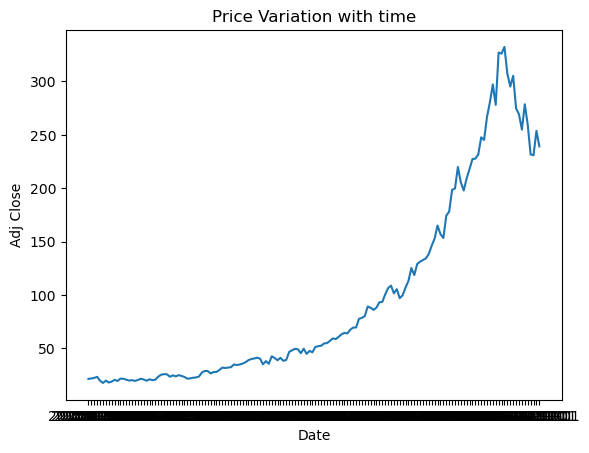

In [27]:
Plot(pricevolumesmonthly, state=0)

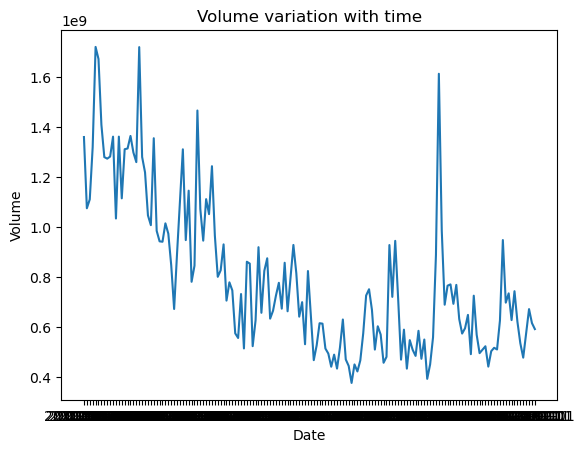

In [28]:
Plot(pricevolumesmonthly, state=1)

#### Correlation

In [45]:
pricevolumesmonthly['Adj Close'].corr(pricevolumesmonthly['Volume'])

-0.45999730572385045

#### Regression

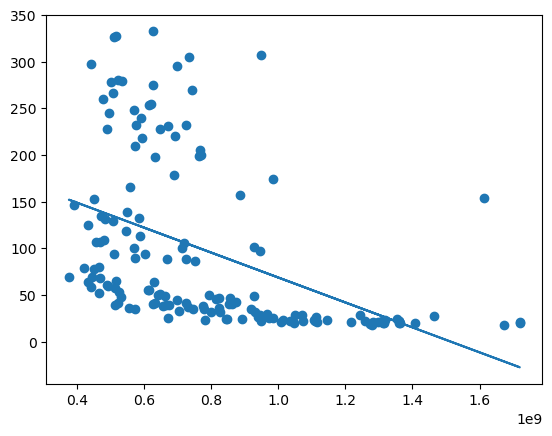

In [29]:
Plot(pricevolumesmonthly)

#### Outliers

In [30]:
x=pricevolumesmonthly["Volume"]
y=pricevolumesmonthly["Adj Close"]

x = sm.add_constant(x)

# fit the model
monthlymodel = sm.OLS(y, x).fit()
print(weeklymodel.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.063
Date:                Wed, 26 Apr 2023   Prob (F-statistic):              0.303
Time:                        10:57:23   Log-Likelihood:                -2471.3
No. Observations:                 418   AIC:                             4947.
Df Residuals:                     416   BIC:                             4955.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.5098     12.315     12.222      0.0

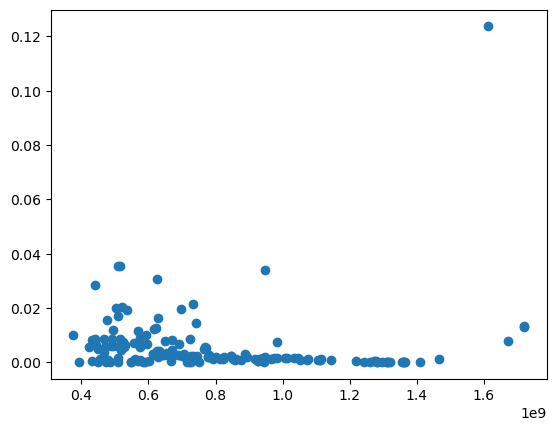

In [31]:
monthlyinfluence=monthlymodel.get_influence()
cooks_distances_monthly=monthlyinfluence.cooks_distance
y=cooks_distances_monthly[0]
x=pricevolumesmonthly["Volume"]
plt.scatter(x,y)

$\text{Threshold}=0.02$

In [32]:
thresh=0.02
pricevolumes_new_monthly=pricevolumesmonthly
for i in range(len(pricevolumesmonthly)):
    if cooks_distances_monthly[0][i]>thresh:
        pricevolumes_new_monthly=pricevolumes_new_monthly.drop(pricevolumes_new_monthly.index[i])


#### Final Model

In [46]:
#Correlation
pricevolumes_new_monthly['Adj Close'].corr(pricevolumes_new_monthly['Volume'])

-0.47037759768472054

$\Rightarrow$ Moderately strong negative relationship

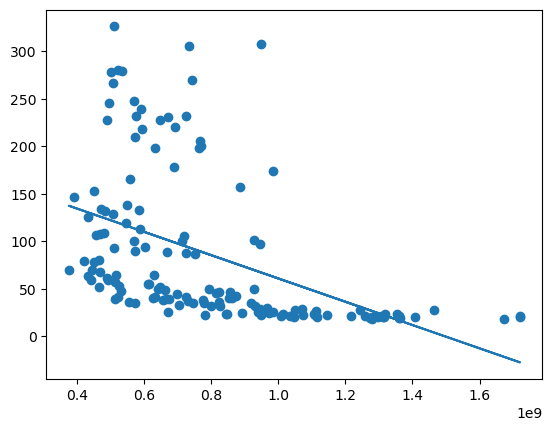

In [33]:
Plot(pricevolumes_new_monthly)

## Task 1.5

In [34]:
testset=pd.read_csv("MSFT_daily_dataset_test.csv")
pricevolumestest=testset.loc[:,["Date", "Adj Close", "Volume"]]

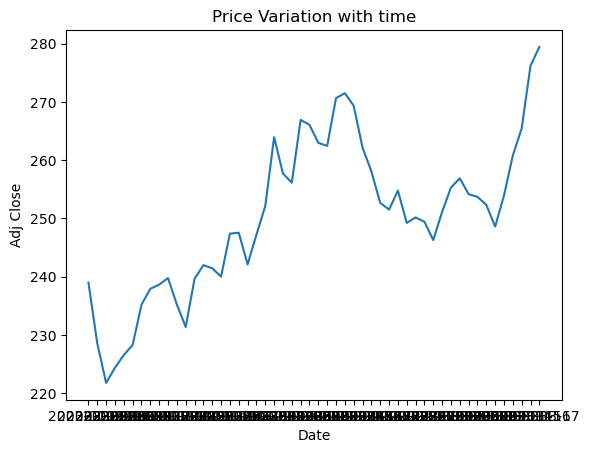

In [35]:
Plot(pricevolumestest, state=0)

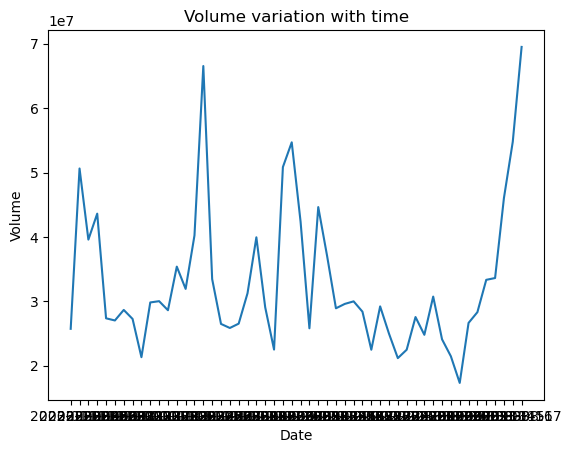

In [36]:
Plot(pricevolumestest, state=1)

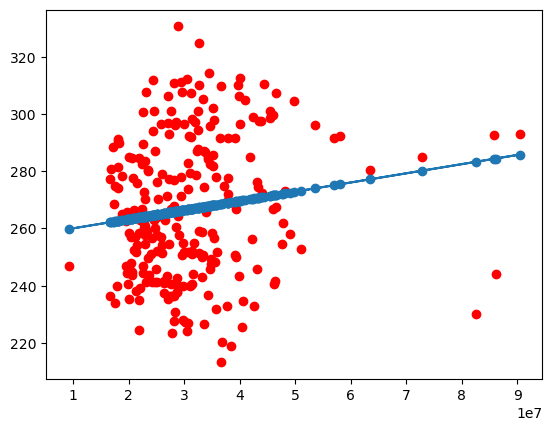

In [37]:
x_0=pricevolumes["Volume"]
y_0=pricevolumes["Adj Close"]
plt.scatter(x_0,y_0,color='red')
z_0=np.polyfit(x_0,y_0,1)
p_0=np.poly1d(z_0)
plt.plot(x_0,p_0(x_0))
plt.scatter(x_0, p_0(x_0))

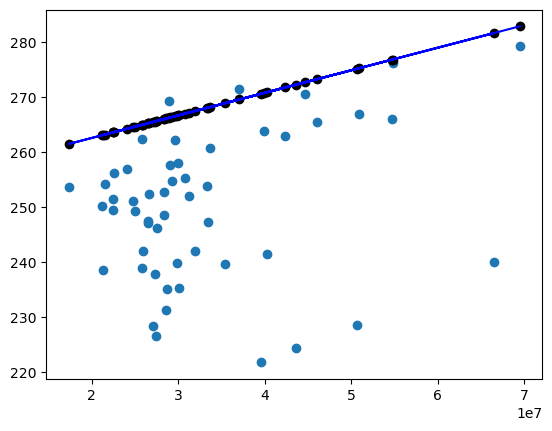

In [38]:
#### Original model 
x_0=pricevolumes_new["Volume"]
y_0=pricevolumes_new["Adj Close"]
# plt.scatter(x_0,y_0,color='red')

z_0=np.polyfit(x_0,y_0,1)
p_0=np.poly1d(z_0)


x=pricevolumestest["Volume"]
y=pricevolumestest["Adj Close"]
plt.scatter(x,y)
plt.scatter(x,p_0(x), color="black")
plt.plot(x,p_0(x), color="blue")

# z=np.polyfit(x,y,1)
# p=np.poly1d(z)
# plt.plot(x,p(x))


In [39]:
predictions=p_0(x)
pricevolumestest['Predicted']=predictions
pricevolumestest.head()


,Date,Adj Close,Volume,Predicted
0,2023-01-03,238.981430,25740000,264.963030
1,2023-01-04,228.527618,50623400,275.177810
2,2023-01-05,221.754562,39585600,270.646729
3,2023-01-06,224.368011,43613600,272.300247
4,2023-01-09,226.552551,27369800,265.632073


#### $\text{RMSE}$

In [40]:
def RMSE(va,vp):
    sum=0
    n=len(vp)
    for i in range(n):
        sum+=(va[i]-vp[i])**2
    ans2=sum/n
    ans=np.sqrt(ans2)
    return ans

In [41]:
RMSE(predictions,pricevolumestest["Adj Close"])

21.91615063462615

$$
\text{RMSE}=21.916
$$

##### Some ways to reduce RMSE:
1. The linear model seems too simplistic, since there was a lot of spread and the best-fit line was not so obvious. Incorporating a quadratic or cubic model may have resulted in more predictive ability


### Volatility

Volatility refers to how prone the prices are to change and therefore how riskier the markets are. To quanitify the volatility of a stock or the whole market in general, we use measures of spread such as the variance(or standard deviation)

In financial contexts, the volatility is "annualised" where $\sigma_{annual}$ is the standard deviation of a stock's yearly logarithmic returns.

> Logarithmic returns:
Suppose you invested a stock at price $V_i$ and after a time t, the stock is now at price $V_f$, then the logarithmic return is:$$  r_{log}=\frac{ln(\frac{V_f}{V_i})}{t}$$The annualised return is when $t=1 \text{ year}$

for a time period of T years, the volatility of the stock is 
    $$\sigma=\sigma_{annual}\sqrt{T}$$

There is also the VIX, the Volatility Index that measures the expected volatility of S&P 500 index. 


### Liquidity

Liquidity refers to the assets sellable at hand, or essentially how much of the assets can be sold in a short period of time. 

To clear this up with examples, a very illiquid asset, such as a house(or any real estate), would be very difficult to sell in a short period of time without incurring heavy losses in selling it at an unfair price. The most liquid asset would be something like cash or coins, something which can be immediately "sold"(you are essentially "selling" cash and buying goods when you buy goods), without incurring heavy losses 

In the stock market, a particular measure of the volatility of a stock is the bid ask spread. The smaller the difference between the bid and the ask price, it means that the stock is easily tradable at a fair price. 

However, if the bid ask spread is higher, it shows that there is a discrepancy, and that trading that stock is going to be harder, and thus making the stock more illiquid

**A high trading volume that the stock can be easily brought and sold and therefore is a liquid asset**